## Multi-arm bandit
---
**Elo notes**

#### Reinforcement Learning - Exploration vs Exploitation

The multi-armed bandit problem models an __agent__ that simultaneously attempts to acquire new knowledge (called __"exploration"__) and optimize his or her decisions based on existing knowledge (called __"exploitation"__). 

The agent attempts to balance these competing tasks in order to maximize his total value over the period of time considered. There are many practical applications of the bandit model, for example:

clinical trials investigating the effects of different experimental treatments while minimizing patient losses, adaptive routing efforts for minimizing delays in a network,
portfolio design.

In these practical examples, the problem requires balancing reward maximization based on the knowledge already acquired with attempting new actions to further increase knowledge. This is known as the exploitation vs. exploration tradeoff in reinforcement learning.

The Multi-Arm Bandit is a way of algorithmically deciding what percent of traffic to send to each version of the site, so that you can still get statistically significant results, but show what is likely to be the better version to a higher percent of users.

We call trying out each site to gather data __exploration__ and showing the site that we believe to be the best __exploitation__. Our goal is to __minimize the regret__, the amount of time you showed a suboptimal site.

The term Multi-Arm Bandit comes from slot machines, as one-armed bandit is another term for a slot machine. Common terminology is to call each version of the site a bandit (or a lever). __Multi-Arm Bandit is actually a class of algorithms__, and Let's explore a few:


[The multi-armed bandit model](https://en.wikipedia.org/wiki/Multi-armed_bandit)


- [Epsilon-greedy](http://stevehanov.ca/blog/index.php?id=132)

[UCB 1](http://courses.cms.caltech.edu/cs101.2/slides/cs101.2-02-Bandits-notes.pdf)

- [Softmax](https://en.wikipedia.org/wiki/Softmax_function)

---
#### Reinforcement learning - Softmax function

In the field of __reinforcement learning__, a softmax function can be used to convert values into action probabilities. 

The function commonly used is:
$$
P_t(a) = \frac{\exp(q_t(a)/\tau)}{\sum_{i=1}^n\exp(q_t(i)/\tau)} \text{,}
$$

where the action value $q_t(a)$ corresponds to the expected reward of following action a and $\tau$ is called a temperature parameter (in allusion to __statistical mechanics__). For high temperatures ($\tau\to \infty$), all actions have nearly the same probability and the lower the temperature, the more expected rewards affect the probability. For a low temperature ($\tau\to 0^+$), the probability of the action with the highest expected reward tends to 1.


In [80]:
from __future__ import division

from mab_strategy import MAB_Strategy, epsilon_greedy, bayesian_bandit
from mab_strategy import random_choice, softmax, max_mean, ucb1
from bandits import Bandits

import pandas as pd
import numpy as np

import matplotlib.pyplot as plot

% matplotlib inline

In [81]:
probabilities = [0.05, 0.03, 0.06]
rounds = 10000

In [82]:
def simulating_strategies(bandits_p, strategy_function, rounds):
    bandits = Bandits(bandits_p)
    strategy = MAB_Strategy(bandits, strategy_function)
    strategy.simulation(rounds)
    conversion_rate = strategy.r_jt / strategy.T_jt
    print 'Simulated strategy:', strategy_function
    print 'Best evaluated site:', np.argmax(conversion_rate)
    print 'With a total of {} conversions of {}views'.format(strategy.r_jt.sum(), strategy.T_jt.sum())
    print 'Views(Trials/Traffic) per Site version(Bandits):', strategy.T_jt
    print 'Conversions(Wins/Clicks) per Site version(Bandits):', strategy.r_jt
    print 'Conversion Rate per Site version(Bandits):\n', conversion_rate
    strategy_regret = strategy.regret()
    return strategy_regret

In [83]:
rc_regret = simulating_strategies(probabilities, random_choice, rounds)

Simulated strategy: <function random_choice at 0x1189ecaa0>
Best evaluated site: 2
With a total of 458 conversions of 10003views
Views(Trials/Traffic) per Site version(Bandits): [3328 3273 3402]
Conversions(Wins/Clicks) per Site version(Bandits): [163  94 201]
Conversion Rate per Site version(Bandits):
[ 0.04897837  0.02871983  0.05908289]


In [84]:
eg_regret = simulating_strategies(probabilities, epsilon_greedy, rounds)

Simulated strategy: <function epsilon_greedy at 0x1189ec848>
Best evaluated site: 2
With a total of 455 conversions of 10003views
Views(Trials/Traffic) per Site version(Bandits): [3329 3354 3320]
Conversions(Wins/Clicks) per Site version(Bandits): [144 109 202]
Conversion Rate per Site version(Bandits):
[ 0.04325623  0.03249851  0.06084337]


In [85]:
maxm_regret = simulating_strategies(probabilities, max_mean, rounds)

Simulated strategy: <function max_mean at 0x118fed050>
Best evaluated site: 1
With a total of 470 conversions of 10003views
Views(Trials/Traffic) per Site version(Bandits): [10001     1     1]
Conversions(Wins/Clicks) per Site version(Bandits): [468   1   1]
Conversion Rate per Site version(Bandits):
[ 0.04679532  1.          1.        ]


In [86]:
softmax_regret = simulating_strategies(probabilities, softmax, rounds)

Simulated strategy: <function softmax at 0x1189ec7d0>
Best evaluated site: 2
With a total of 474 conversions of 10003views
Views(Trials/Traffic) per Site version(Bandits): [3357 3293 3353]
Conversions(Wins/Clicks) per Site version(Bandits): [173  95 206]
Conversion Rate per Site version(Bandits):
[ 0.05153411  0.02884907  0.06143752]


In [87]:
ucb1_regret = simulating_strategies(probabilities, ucb1, rounds)

Simulated strategy: <function ucb1 at 0x1189ec758>
Best evaluated site: 2
With a total of 499 conversions of 10003views
Views(Trials/Traffic) per Site version(Bandits): [3251 1652 5100]
Conversions(Wins/Clicks) per Site version(Bandits): [144  50 305]
Conversion Rate per Site version(Bandits):
[ 0.04429406  0.03026634  0.05980392]


In [88]:
bayes_regret = simulating_strategies(probabilities, bayesian_bandit, rounds)

Simulated strategy: <function bayesian_bandit at 0x1189ec050>
Best evaluated site: 2
With a total of 567 conversions of 10003views
Views(Trials/Traffic) per Site version(Bandits): [ 384  305 9314]
Conversions(Wins/Clicks) per Site version(Bandits): [ 13   8 546]
Conversion Rate per Site version(Bandits):
[ 0.03385417  0.02622951  0.05862143]


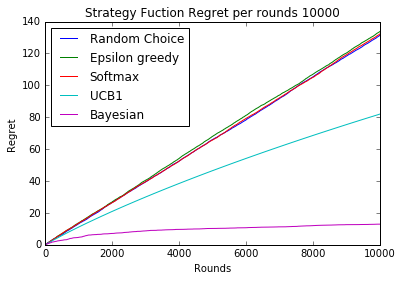

In [89]:
x = range(rounds)
plt.plot(x, rc_regret, label= 'Random Choice')
plt.plot(x, eg_regret, label= 'Epsilon greedy')
plt.plot(x, softmax_regret, label= 'Softmax')
plt.plot(x, ucb1_regret, label= 'UCB1')
plt.plot(x, bayes_regret, label='Bayesian')
plt.title('Strategy Fuction Regret per rounds {}'.format(rounds))
plt.xlabel('Rounds')
plt.ylabel('Regret')
plt.legend(loc='left')

In [90]:
# import numpy as np
# import random

# class MAB_Strategy(object):
#   def __init__(self, bandits, strategy_f):
#     # Selected mab strategy
#     self.strategy_f = strategy_f
#     # Expected value of slot machine arm
#     self.bandits = bandits
#     n_bandits = len(self.bandits)
#     # n: rounds : Total number of plays we will make (known and specified in advance)
#     # Initializing with at least one round per bandit
#     self.n = n_bandits
#     # Wins : r_t : reward of arm j in round t
#     self.r_jt = np.ones(n_bandits).astype(int)
#     # Trials: number of times arm j pulled during the first t plays
#     self.T_jt = np.ones(n_bandits).astype(int)
#     # Index of the selected bandit in round t
#     self.bandit_ixt = []
#     # score per round
#     self.score = []

#   def simulation(self, n = 1):
#     bandit_ixt = np.zeros(n)
#     score = np.zeros(n)

#     # np.random.seed(101)
#     # random.seed(101)

#     for t in range(n):
#       # Obtaining the bandit's prior
#       bandit_ix = self.strategy_f(self)
#       # Simulating presenting the chosen bandit (Site) to visitor (np.random.random())
#       # True if the choosing the ith arm led to a conversion
#       conversion = self.bandits.pull(bandit_ix)
#       # Updating priors and score per round t
#       self.r_jt[bandit_ix] += conversion
#       self.T_jt[bandit_ix] += 1
#       score[t] = conversion
#       self.n += 1
#       bandit_ixt[t] = bandit_ix
#     # Update priors and scores by concatenate selected bandit per strategy (row-wise)
#     self.bandit_ixt = np.r_[self.bandit_ixt, bandit_ixt]
#     self.score = np.r_[self.score, score]

#   def regret(self):
#     # x_j(t) :  # E[X_jt] :  self.bandits.p_array : Sample average(Expected Value) of all rewards of bandit j at play t
#     # E[X_jt] : mean_j :  Expected value of random variable for reward of arm j at time t
#     # p_optimal : mean_j* : argmax(E[X_jt]) : is the maximal reward mean
#     EX_jt = np.array(self.bandits.p_array)
#     p_optimal = np.max(EX_jt)
#     return np.cumsum(p_optimal - np.array(EX_jt)[self.bandit_ixt.astype(int)])

# def max_mean(self):
#   '''
#   Strategy_f : Select the bandit with the current best (maximum) observed winning
#   proportion.
#   RETURN: The index of the bandit selected by this strategy function
#   '''
#   if len(self.T_jt.nonzero()[0]) < len(self.bandits):
#     return np.random.randint(0, len(self.bandits))
#   return np.argmax(self.r_jt / (self.T_jt + 1))

# def random_choice(self):
#   '''
#   Select a bandit uniformly at random
#   RETURN: Index of the selected bandit
#   '''
#   return np.random.randint(0, len(self.bandits))

# def epsilon_greedy(self, epsilon=0.1):
#   '''
#   Select a bandit uniformly at random epsilon percent of the time
#   (10% is a standard epsilon value) the remaining 90% of the time select
#   the bandit with the best observed proportion of winning
#   RETURN: The index of the selected bandits under this strategy
#   '''
#   # Exploration
#   rv = np.random.random()
#   if rv < epsilon or len(self.score) == 0:
#     chosen_bandit = np.random.randint(0, len(self.bandits))
#   # Exploitation
#   else:
#     chosen_bandit = np.argmax(self.r_jt / (self.T_jt + 1))
#   return chosen_bandit

# def softmax(self, tau=0.1):
#   '''
#   Softmax or Normalized exponential function is a generalization of the logistic function
#   Select a bandit from a Boltzman distribution
#   Tau: 0.1 is a standard value
#   ereward: expexted reward : CTR : energy
#   RETURN: Index of the selected bandit
#   '''
#   ereward = self.r_jt / (self.T_jt + 1)
#   prob = np.exp(ereward/tau) / sum(np.exp(ereward/tau))

#   return np.random.choice(range(len(self.bandits)), 1, p=prob)

# def ucb1(self):
#   '''
#   Upper Confidence Bound
#   x_j(t) :  # E[X_jt] :  self.bandits.p_array : Sample average(Expected Value) of all rewards of bandit j at play t
#   T_jt :  Trials
#   '''
#   EX_jt = np.array(self.bandits.p_array)
#   confidence_bound = np.sqrt((2 * np.log10(self.n)) / self.T_jt)
#   upper_cb = EX_jt + confidence_bound
#   return np.argmax(upper_cb)

# def bayesian_bandit(self):
#   '''
#   Obtain a rv(random variable) from a beta distribution for each bandit
#   alpha : 1. + Wins(r_jt, rewards) : 1. + Clicks
#   beta : 1. + (Trials - Wins) : 1. + (Views - Clicks)
#   RETURN: The index of the bandit with largest rv value
#   '''
#   alpha = 1. + self.r_jt
#   beta = 1. + (self.T_jt - self.r_jt)
#   rv_ = np.random.beta(alpha, beta)
#   return np.argmax(rv_)
